In [1]:
#For Kaggle
#date=''

#For WL data
source='WL'
date='20241118'

saveImage=False

print('done')

done


In [2]:
import sys
import os
from importlib import reload
fpath = os.path.join('..//scripts')
sys.path.append(fpath)

import warnings
warnings.filterwarnings('ignore')

#loading internal scripts
import frauddetection as fd
import sourcedata as sd
import dataimport as di
import result as resultMd
reload(fd)
reload(sd)
reload(di)
reload(resultMd)

print('done')

done


In [3]:
import pandas as pd

dfTrx = pd.read_csv('../data/cleaned/'+source+'export'+date+'.csv')
dfTrx.head(5)

,db_uuid,trx_date_time,term_mcc,term_country,mcd_fraud_score,vaa_score,trx_cnp,card_pan_id,Class,ecom,...,clusterCardHolder_cluster2,clusterCardHolder_cluster3,clusterCardHolder_cluster4,clusterMerchant_M0,clusterMerchant_M1,clusterMerchant_M2,clusterMerchant_M3,clusterMerchant_UNKNOWN,trx_amount_log10,distancePrevTrx
0,31BD8D38A53C11EFABA49D2778D26ADA,2024-11-18 00:29:22,5499,NLD,214.000000,26.258093,1,450280D96024C965163D7F15687156B138E1BDCB6DC512...,0,1,...,0,0,0,1,0,0,0,0,1.690107,1.1
1,A3E698CEA53B11EFABA49D2778D26ADA,2024-11-18 00:27:12,5499,NLD,225.222235,32.000000,1,68B7CAD29BF263AD2CE80B155DD3D3EE783884F72F7070...,0,1,...,0,0,0,1,0,0,0,0,1.799272,1.1
2,C5D7AAE6A53A11EFAAA0DF784AB5695E,2024-11-18 00:20:15,7011,BEL,152.000000,26.258093,0,02587C2F031D3D22C997A9A4E6CB78D6A87A2C73E61131...,0,1,...,0,0,0,0,0,0,1,0,1.374015,1.0
3,9C87AE3EA53F11EFABA49D2778D26ADA,2024-11-18 00:53:48,5542,BEL,225.222235,26.258093,1,CD32793A75DE03806C854CB3B6C2DF5BB2809C2DA66BA9...,0,1,...,0,0,1,0,0,0,1,0,1.205204,1.0
4,9C87B0B4A53F11EFABA49D2778D26ADA,2024-11-18 00:53:48,5542,BEL,225.222235,26.258093,1,CD32793A75DE03806C854CB3B6C2DF5BB2809C2DA66BA9...,0,1,...,0,0,1,0,0,0,1,0,1.205204,1.1


Duration  7.099495
test-set confusion matrix:
 [[211701     21]
 [   234     14]]
accuracy score: 0.9988
balanced accuracy score: 0.5282
recall score: 0.0565
precision score: 0.4000
f1 score: 0.0989
mcc score: 0.1499
roc auc score: 0.5282
test-set confusion matrix:
 [[846842     43]
 [   916     78]]
accuracy score: 0.9989
balanced accuracy score: 0.5392
recall score: 0.0785
precision score: 0.6446
f1 score: 0.1399
mcc score: 0.2246
roc auc score: 0.5392
test-set confusion matrix:
 [[211701     21]
 [   234     14]]
accuracy score: 0.9988
balanced accuracy score: 0.5282
recall score: 0.0565
precision score: 0.4000
f1 score: 0.0989
mcc score: 0.1499
roc auc score: 0.5282


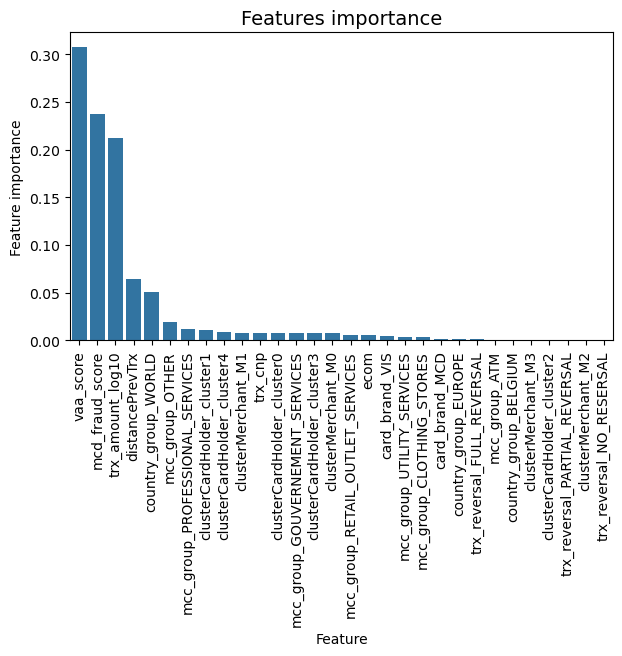

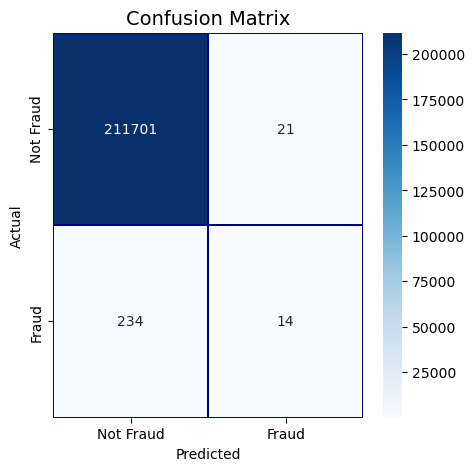

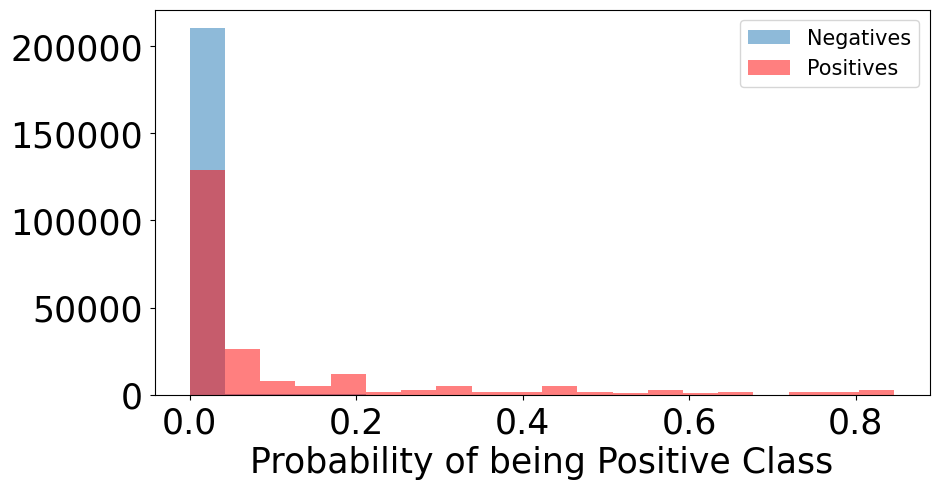

In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from datetime import datetime

then= datetime.now()
predictors = fd.getPredictors(dfTrx)

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

modelClf = DecisionTreeClassifier(random_state=42)
parameters={'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 26}
modelClf.set_params(**parameters)

modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)
#resultMd.update_time_response_result('06-sklearn.tree','DecisionTree','2-After tuning', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('06-sklearn.tree','DecisionTree','2-After tuning', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test,'../imgs/FD06A-DecisionTreeClassifierProbaHistogram' if saveImage else None)



--- threshold -- 0.025
test-set confusion matrix:
 [[210008   1714]
 [   131    117]]
accuracy score: 0.9913
balanced accuracy score: 0.7318
recall score: 0.4718
precision score: 0.0639
f1 score: 0.1126
mcc score: 0.1713
roc auc score: 0.7318
--- threshold -- 0.05
test-set confusion matrix:
 [[210646   1076]
 [   153     95]]
accuracy score: 0.9942
balanced accuracy score: 0.6890
recall score: 0.3831
precision score: 0.0811
f1 score: 0.1339
mcc score: 0.1743
roc auc score: 0.6890
--- threshold -- 0.1
test-set confusion matrix:
 [[211307    415]
 [   191     57]]
accuracy score: 0.9971
balanced accuracy score: 0.6139
recall score: 0.2298
precision score: 0.1208
f1 score: 0.1583
mcc score: 0.1653
roc auc score: 0.6139
--- threshold -- 0.15
test-set confusion matrix:
 [[211458    264]
 [   193     55]]
accuracy score: 0.9978
balanced accuracy score: 0.6103
recall score: 0.2218
precision score: 0.1724
f1 score: 0.1940
mcc score: 0.1945
roc auc score: 0.6103
--- threshold -- 0.2
test-set co

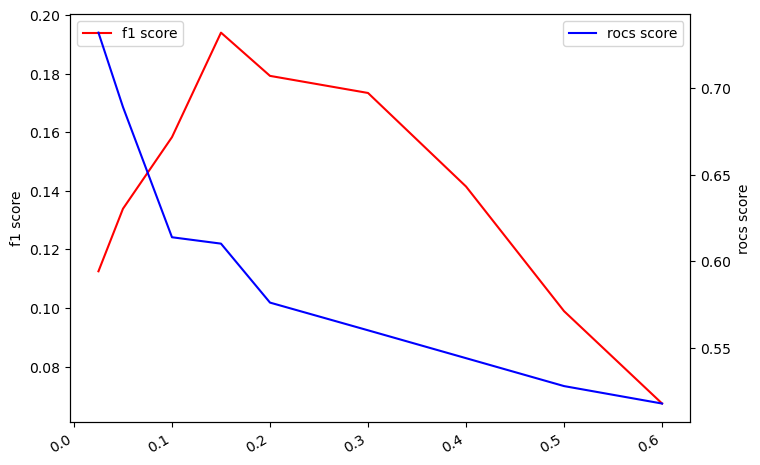

In [5]:
y_pred_prob = modelClf.predict_proba(x_test)[:,1]

range = []
f1s = []
rocs = []
for threshold  in [0.025,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6]:
    print("--- threshold --", threshold)
    y_pred_adjusted = (y_pred_prob>threshold).astype(int)
    f1,mcc,roc=fd.print_scores(y_test, y_pred_adjusted,'all')
    range.append(threshold)
    f1s.append(f1)
    rocs.append(roc)

fd.plt_train_test(range, f1s,"f1 score",rocs,"rocs score")

export20241118.csv
test-set confusion matrix:
 [[1057318    1289]
 [    787     455]]
accuracy score: 0.9980
balanced accuracy score: 0.6826
recall score: 0.3663
precision score: 0.2609
f1 score: 0.3048
mcc score: 0.3082
roc auc score: 0.6826


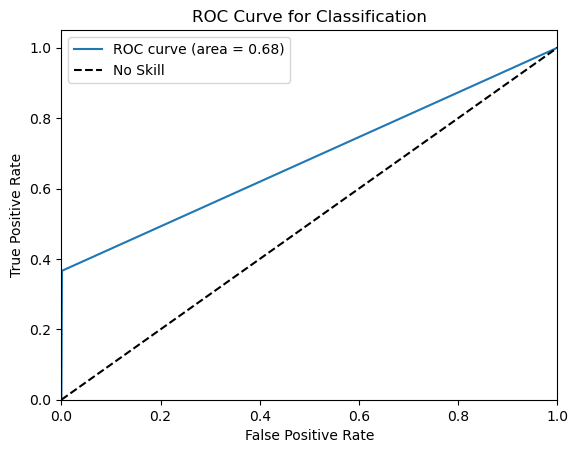

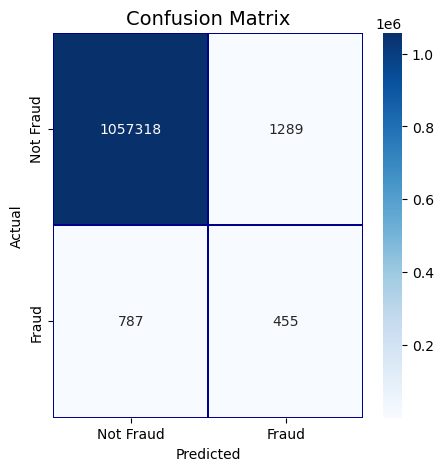

export20241119.csv
test-set confusion matrix:
 [[987423   1488]
 [   970    177]]
accuracy score: 0.9975
balanced accuracy score: 0.5764
recall score: 0.1543
precision score: 0.1063
f1 score: 0.1259
mcc score: 0.1269
roc auc score: 0.5764


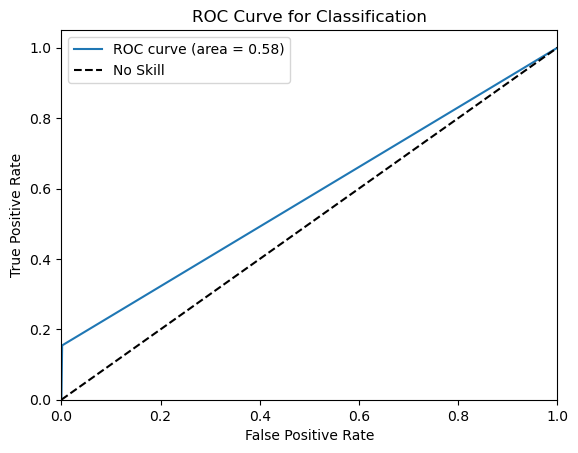

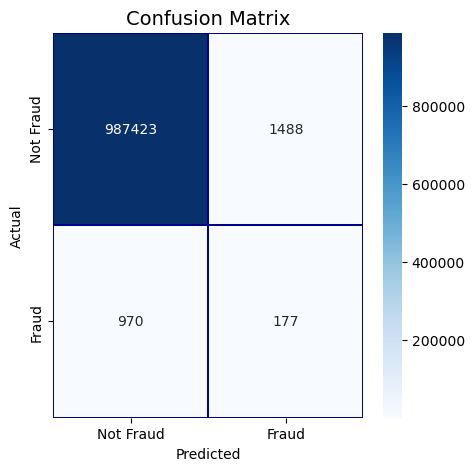

export20241120.csv
test-set confusion matrix:
 [[1065745    1379]
 [   1124     194]]
accuracy score: 0.9977
balanced accuracy score: 0.5730
recall score: 0.1472
precision score: 0.1233
f1 score: 0.1342
mcc score: 0.1336
roc auc score: 0.5730


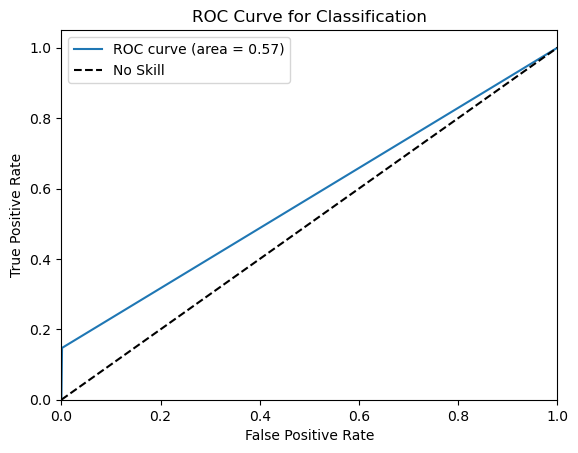

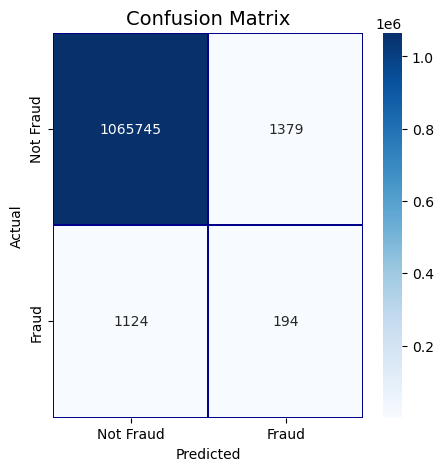

export20241121.csv
test-set confusion matrix:
 [[1073921    1363]
 [   1077     137]]
accuracy score: 0.9977
balanced accuracy score: 0.5558
recall score: 0.1129
precision score: 0.0913
f1 score: 0.1010
mcc score: 0.1004
roc auc score: 0.5558


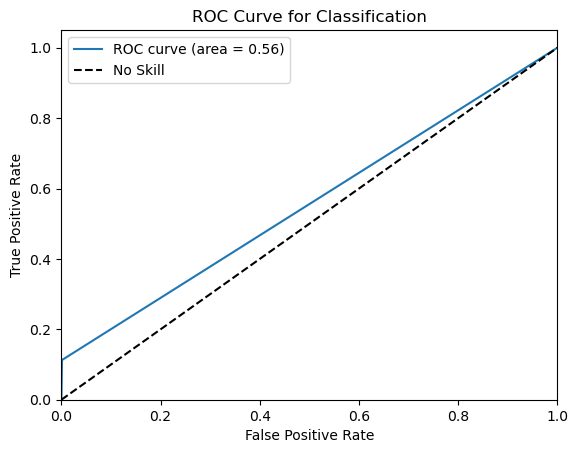

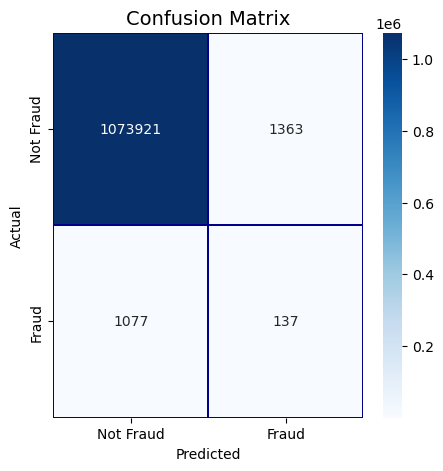

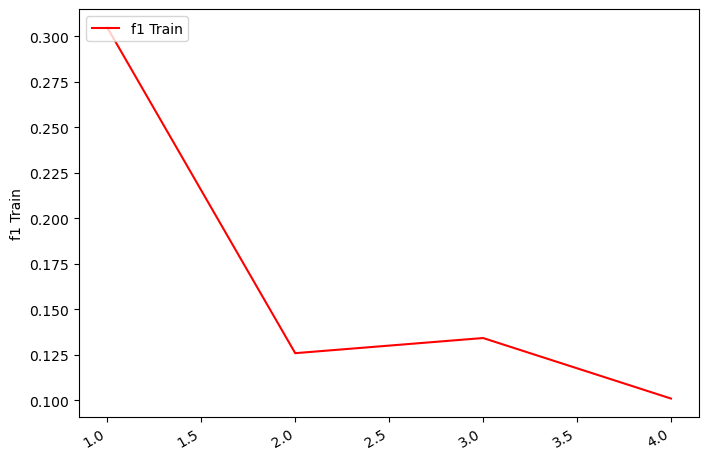

In [14]:
files = fd.getAllFiles()

range = []
f1s = []
rocs = []
loop =0
threshold=0.15
for file in files:
    loop=loop+1
    range.append(loop)
    print(file)
  
    dfTrx = pd.read_csv('../data/cleaned/'+source+file)
    predictors = fd.getPredictors(dfTrx)

    y_pred_prob = modelClf.predict_proba(dfTrx[predictors])[:,1]
    y_pred_adjusted = (y_pred_prob>threshold).astype(int)

    f1,mcc,roc= fd.print_scores(dfTrx['Class'], y_pred_adjusted,'All', True)
    
    #fd.show_importance(modelClf,predictors)
    fd.show_confusion_matrix(dfTrx['Class'], y_pred_adjusted)
    f1s.append(f1)
    rocs.append(roc)

fd.plt_train_test(range, f1s)
resultMd.update_performance_nextdays_result('06-sklearn.tree','DecisionTreeClassifier','3-After threshold', f1s[0],f1s[1],f1s[2],f1s[3],rocs[0],rocs[1],rocs[2],rocs[3])

